In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [43]:
dtypes = {'nt_fp': str, 'event_date': str, 'day_of_week': int, 'a_month': int, 'hour_of_day': int, 's_depcity': str, 's_adults': int, 
          's_children': int, 'ua_browser': str, 'ua_device_type': str, 'ua_platform': str, 'ip_lat': int, 'ip_long': int,
          's_country': str}

parse_dates = ['event_date']

data_df = pd.read_csv('~/Desktop/events-by-week.csv', index_col=False,  dtype=dtypes, parse_dates=parse_dates)

data_df['week_of_year'] = data_df['event_date'].dt.week

data_target = data_df['s_country']
# data_features = data_df.drop(columns=['s_country', 'event_date', 'nt_fp', 's_depcity', 
#                                       'ua_device_type', 'ua_browser', 'day_of_week', 'ip_lat',
#                                       'ua_platform', 'hour_of_day', 'a_month'])

data_features = data_df.drop(columns=['s_country', 'event_date', 'nt_fp', 's_depcity', 
                                      'ua_device_type', 'ua_browser', 'day_of_week', 'week_of_year',
                                      'ua_platform', 'hour_of_day', 'a_month'])



data_dummies = pd.get_dummies(data_features)
# data_dummies = data_features

index_split = int (round(data_dummies.shape[0] * 0.75, 0))

train_X = data_dummies[:index_split][:]
test_X = data_dummies[index_split:][:]
train_y = data_target[:index_split][:]
test_y = data_target[index_split:][:]

X_train = train_X.values
X_test = test_X.values
y_train = train_y.values
y_test = test_y.values

KeyError: 'day_of_week'

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

### С нормализованными данными

In [21]:
data_dummies = preprocessing.normalize(data_features)
data_dummies.size

1693505

In [22]:
index_split = int (round(data_dummies.size * 0.75, 0))

In [24]:
X_train = data_dummies[:index_split][:]
X_test = data_dummies[index_split:][:]
y_train = data_target[:index_split][:]
y_test = data_target[index_split:][:]



In [25]:
grb = GradientBoostingClassifier(n_estimators=50, random_state=17, learning_rate=0.01)
grb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=17, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
# print("Правильность на обучающем наборе: {:.5f}".format(grb.score(X_train, y_train)))
# print('Правильность на тестовом наборе: {:.5f}'.format(grb.score(X_test, y_test)))

In [ ]:
predictions = grb.predict(X_test)

In [ ]:
for name, score in zip(data_samples.columns, grb.feature_importances_):
    print(name, score)

### Со стандартизированными данными

In [ ]:
data_dummies = preprocessing.scale(data_features)

index_split = int (round(data_dummies.size * 0.75, 0))

X_train = data_dummies[:index_split][:]
X_test = data_dummies[index_split:][:]
y_train = data_target[:index_split][:]
y_test = data_target[index_split:][:]

In [ ]:
grb = GradientBoostingClassifier(n_estimators=50, random_state=17, learning_rate=0.01)
grb.fit(X_train, y_train)

In [ ]:
print("Правильность на обучающем наборе: {:.5f}".format(grb.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.5f}'.format(grb.score(X_test, y_test)))

In [ ]:
predictions = grb.predict(X_test)

In [ ]:
for name, score in zip(data_samples.columns, grb.feature_importances_):
    print(name, score)

In [30]:
data_df.shape


(338701, 15)

In [44]:
data_features.head()

,s_adults,s_children,ip_lat,ip_long
0,0,0,52,31
1,2,0,56,38
2,0,0,56,38
3,0,0,43,77
4,0,0,43,77


### Графики

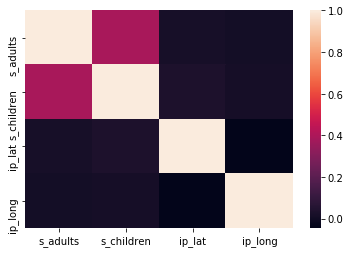

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(data_dummies.corr())

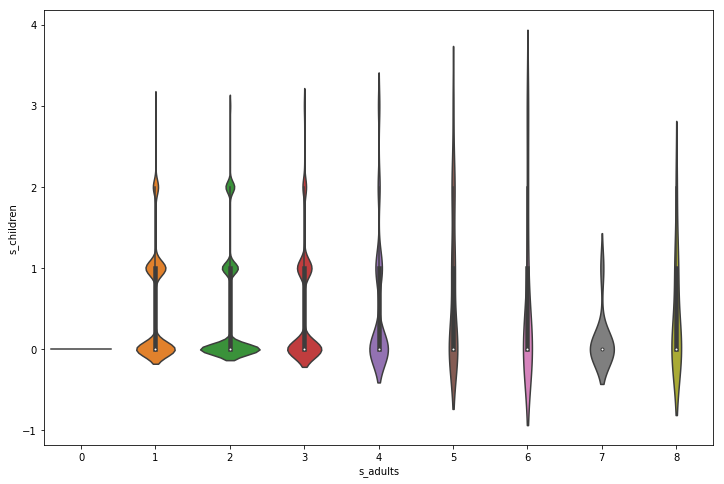

In [10]:
plt.rcParams['figure.figsize'] = 12, 8
sns.violinplot(data_df['s_adults'], data_df['s_children'])

In [ ]:
for i, col in enumerate(data_df.columns[:-1]):
    plt.subplot(5,3,i+1)
    plt.scatter(data_df[col], data_df['s_country'])
    plt.title(col)

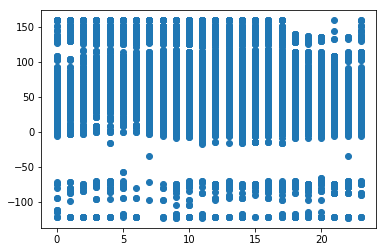

In [9]:
plt.scatter(data_df['hour_of_day'], data_df['ip_long']) 

### Линейные модели

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [33]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [34]:
scaler = StandardScaler()
# масштабируем данные
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/mikhail/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# среднеквадратичная ошибка между ответами на тестовой выборке и прогнозами метода наименьших квадратов
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test_scaled)) )

119111.31396781199

In [46]:
pd.DataFrame(linreg.coef_, data_dummies.columns[:], columns=['coef']).sort_values(by='coef', ascending=False)

,coef
s_adults,5214.437986
s_children,532.858615
ip_lat,457.913766
ip_long,346.383888


In [47]:
# модель, котора будет возвращать список коэффициентов:

def report(model, X_train_scaled, y_train, X_test_scaled, y_test, feature_names):
    model.fit(X_train_scaled, y_train)
    print('MSE = %f' % np.sqrt(mean_squared_error(y_test, linreg.predict(X_test_scaled))))
    print(pd.DataFrame(model.coef_, feature_names, columns=['coef']).sort_values(by='coef', ascending=False))

In [48]:
report(lasso, X_train_scaled, y_train, X_test_scaled, y_test, data_dummies.columns[:])

MSE = 119111.313968
                   coef
s_adults    5213.820585
s_children   532.148627
ip_lat       456.908911
ip_long      345.360173


In [49]:
report(lasso_cv, X_train_scaled, y_train, X_test_scaled, y_test, data_dummies.columns[:])

MSE = 119111.313968
                   coef
s_adults    5010.467187
s_children   336.543094
ip_lat       166.614857
ip_long       49.602080


In [50]:
report(ridge, X_train_scaled, y_train, X_test_scaled, y_test, data_dummies.columns[:])

MSE = 119111.313968
                   coef
s_adults    5214.414755
s_children   532.865662
ip_lat       457.912122
ip_long      346.382653


In [51]:
report(ridge_cv, X_train_scaled, y_train, X_test_scaled, y_test, data_dummies.columns[:])

MSE = 119111.313968
                   coef
s_adults    5214.205696
s_children   532.929079
ip_lat       457.897333
ip_long      346.371542
